# Task 2

## Imports

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Load dataset

In [189]:
df = pd.read_csv('JO_pivoted.csv')

print(df.columns)

Index(['Unnamed: 0', 'region', 'year', 'barley', 'energy forest',
       'fallow land',
       'field peas for cooking, fodder peas, vetches and field beans',
       'green fodder', 'green peas', 'horticulture plants',
       'ley for hay and forage plants', 'ley for seeds', 'mixed grain',
       'mixed grain and triticale', 'not utilized ley for hay and pasture',
       'oats', 'oil flax', 'other crops', 'other untilled arable land',
       'potatoes for processing of starch', 'rye', 'spring barley',
       'spring rape', 'spring turnip rape', 'spring wheat', 'sugar beets',
       'table potatoes', 'total arable land', 'triticale',
       'unspecified arable land', 'utilized ley for hay',
       'utilized ley for hay and pasture', 'utilized pasture', 'white beans',
       'winter barley', 'winter rape', 'winter turnip rape', 'winter wheat'],
      dtype='object')


## Data cleaning and slight data analysis
Lets check if there are any and remove NaN values in the dataset.

Remove the Unnamed column.

Lets also check some basic statistics of the dataset.

In [190]:
if df.isna().values.any():
    print('Removing NaN values')
    df_clean = df.dropna()
else:
    print('No NaN values found')

df_clean = df.drop(columns=['Unnamed: 0'])

#years are more interesting then the unique values for crops, as they are all numerical, there is a lot of them
print("\nUnique values for 'year':", df_clean['year'].unique())
# we only have numerical values, so we get a lot of unique values
print("Unique values for 'oats':", df_clean['oats'].unique())


print("\nNumeric column statistics:")
print(df_clean.describe())

No NaN values found

Unique values for 'year': [1981 1985 1989 1990 1991 1992 1993 1994 1995 1999 2001 2002 2003 2005]
Unique values for 'oats': [ 225.  199.  142. ...  985. 1020. 1108.]

Numeric column statistics:
              year        barley  energy forest  fallow land  \
count  4060.000000   4060.000000    4060.000000  4060.000000   
mean   1994.285714    831.992611      17.554433   611.955172   
std       6.787678   2056.581685      79.077259  1031.400452   
min    1981.000000      0.000000       0.000000     0.000000   
25%    1990.000000      0.000000       0.000000    70.000000   
50%    1993.500000      0.000000       0.000000   227.000000   
75%    2001.000000    712.000000       0.000000   655.000000   
max    2005.000000  24303.000000    1112.000000  8402.000000   

       field peas for cooking, fodder peas, vetches and field beans  \
count                                        4060.000000              
mean                                           86.222906          

## Vizualize the data and try to find some interesting insights

We will create some histograms

### Lets have a look at winter weath with Pandas API

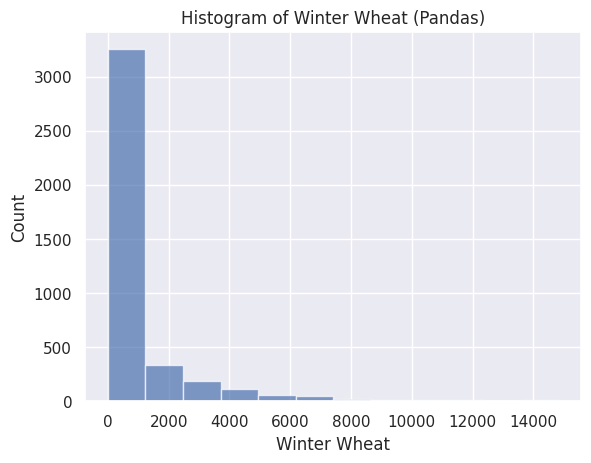

In [191]:
df_clean['winter wheat'].plot.hist(bins=12, alpha=0.7)
plt.title('Histogram of Winter Wheat (Pandas)')
plt.xlabel('Winter Wheat')
plt.ylabel('Count')
plt.show()

### Lets use seaborn's API to plot the data, lets look at oats

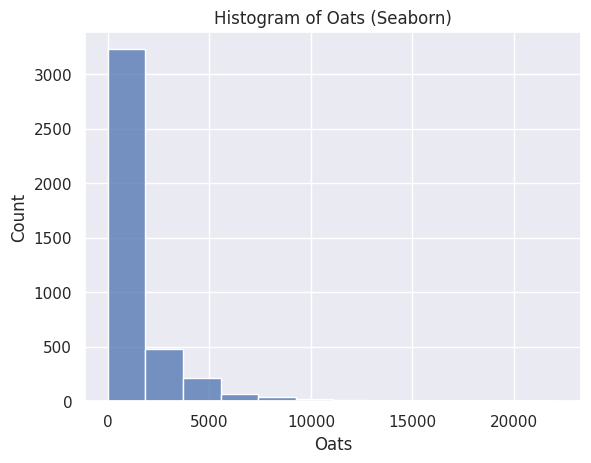

In [192]:
sns.histplot(df_clean['oats'], bins=12, kde=False)
plt.title('Histogram of Oats (Seaborn)')
plt.xlabel('Oats')
plt.ylabel('Count')
plt.show()

### Lets try to produce a histogram of 'spring barley' conditioned on 'winter barley'
It might be intersting to see how the different seasons affect the yield of the crops.


/home/aie/work/dsp/venv/lib/python3.12/site-packages/seaborn/distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)
/home/aie/work/dsp/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


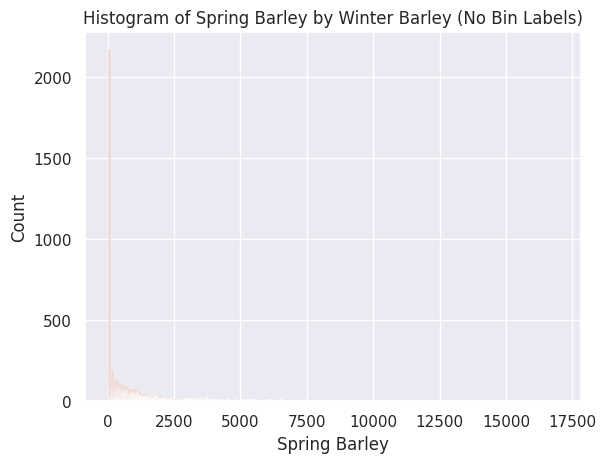

In [193]:
sns.histplot(data=df_clean, x='spring barley', hue='winter barley', multiple='stack')
plt.title('Histogram of Spring Barley by Winter Barley (No Bin Labels)')
plt.xlabel('Spring Barley')
plt.ylabel('Count')
plt.legend([],[], frameon=False)
plt.show()

## This is not really useful, both variables are continious, 'winter barley' and 'spring barley'
Lets have a look at spring barley conditioned on year instead.

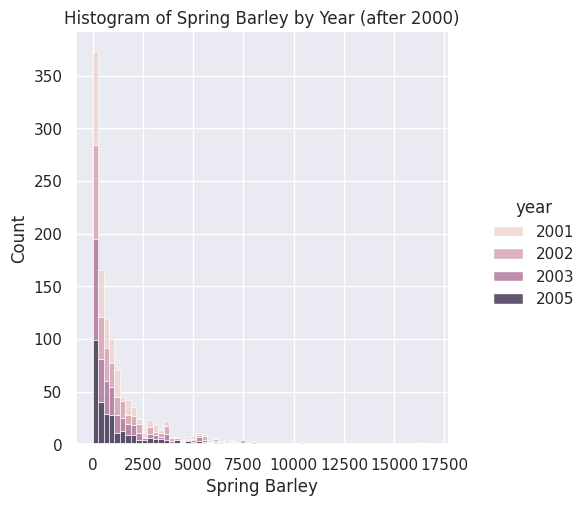

In [194]:
# Lets minimize the number of years for a clearer histogram
sns.displot(data=df_clean[df_clean['year'] > 2000], x='spring barley', hue='year', multiple='stack')
plt.title('Histogram of Spring Barley by Year (after 2000)')
plt.xlabel('Spring Barley')
plt.ylabel('Count')
plt.show()

### Maybe turning a histogram into a KDE plot will be more informative

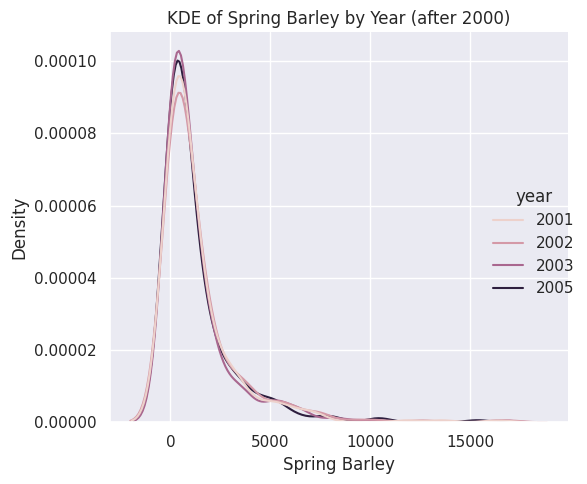

In [195]:
sns.displot(data=df_clean[df_clean['year'] > 2000], x='spring barley', hue='year', multiple='layer', kind='kde')
plt.title('KDE of Spring Barley by Year (after 2000)')
plt.xlabel('Spring Barley')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

### We will have a look at some scatter plots and see if that is more informative

Lets look at the correlation between the spring barley and winter barley

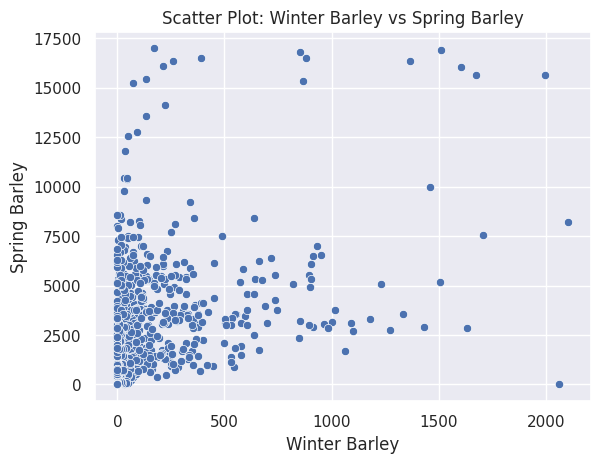

In [196]:
# Scatter plot: 'winter barley' vs. 'spring barley'
sns.scatterplot(data=df_clean, x='winter barley', y='spring barley')
plt.title('Scatter Plot: Winter Barley vs Spring Barley')
plt.xlabel('Winter Barley')
plt.ylabel('Spring Barley')
plt.show()

### Lets colour it by year

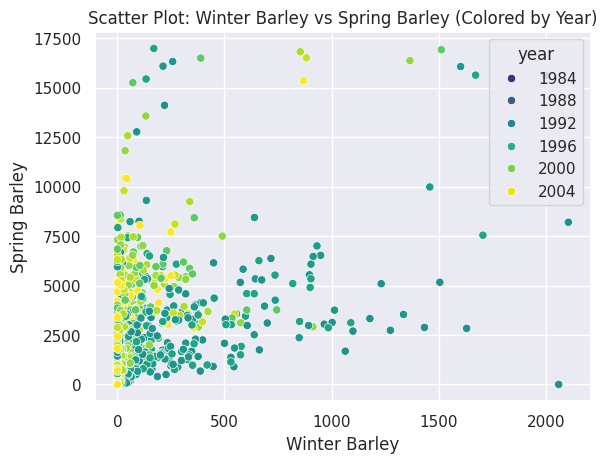

In [197]:
# Scatter plot: 'winter barley' vs. 'spring barley', colored by 'year'
sns.scatterplot(data=df_clean, x='winter barley', y='spring barley', hue='year', palette='viridis')
plt.title('Scatter Plot: Winter Barley vs Spring Barley (Colored by Year)')
plt.xlabel('Winter Barley')
plt.ylabel('Spring Barley')
plt.show()

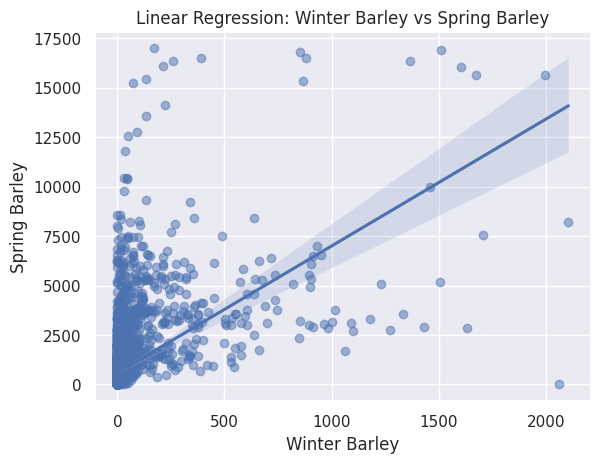

In [198]:
sns.regplot(data=df_clean, x='winter barley', y='spring barley', scatter_kws={'alpha':0.5})
plt.title('Linear Regression: Winter Barley vs Spring Barley')
plt.xlabel('Winter Barley')
plt.ylabel('Spring Barley')
plt.show()

/home/aie/work/dsp/venv/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


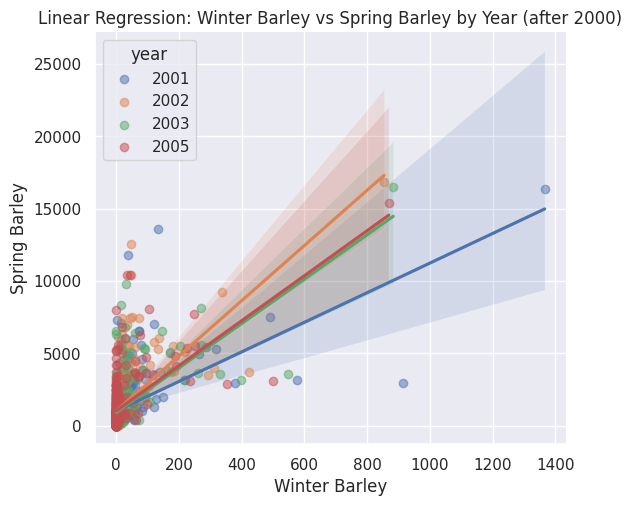

In [199]:
sns.lmplot(data=df_clean[df_clean['year'] > 2000], x='winter barley', y='spring barley', hue='year', scatter_kws={'alpha': 0.5}, height=5, aspect=1.2, legend_out=False)
plt.title('Linear Regression: Winter Barley vs Spring Barley by Year (after 2000)')
plt.xlabel('Winter Barley')
plt.ylabel('Spring Barley')
plt.show()

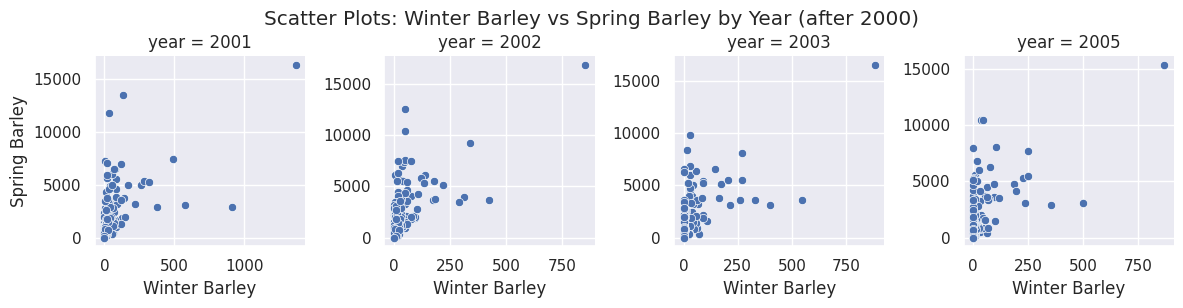

In [200]:
g = sns.relplot(
    data=df_clean[df_clean['year'] > 2000],
    x='winter barley',
    y='spring barley',
    col='year',
    col_wrap=4,
    kind='scatter',
    height=3,
    facet_kws={'sharex': False, 'sharey': False}
)
g.set_axis_labels('Winter Barley', 'Spring Barley')
g.fig.suptitle('Scatter Plots: Winter Barley vs Spring Barley by Year (after 2000)', y=1.02)
plt.show()

## Results
In general, the scatter plots seems to be more informative than the other plots. The histograms are not really useful as we have continous variables and we are trying to plot it as a categorical variable (only year can be somewhat used as a categorical variable), this does not make sense. Same goes for the linear regression plots, even plotting by year makes it difficult, as we have many years, limiting the years makes it somewhat more useful, maybe limiting it to only 3 or 4 years would be ideal, but this would not make it possible to cover the whole dataset.  The scatter plots are more informative as they show the relationship between the two variables.